In [1]:
# Run some setup code for this notebook.
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previusly loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
# print(y_test)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


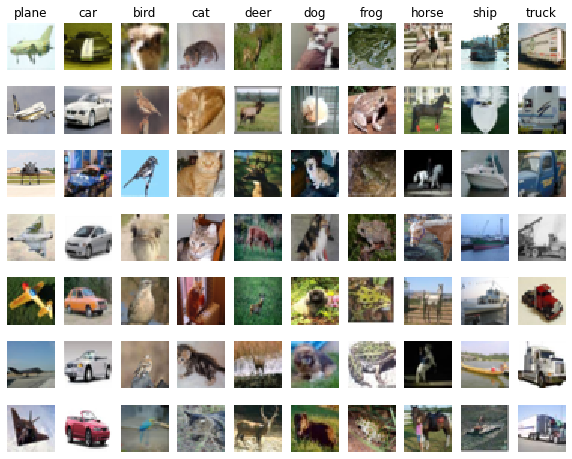

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_label_train = [0,0,0,0,0,0,0,0,0,0]
a =0
for i in range(y_train.shape[0]):
#     if y_train[i]==6:
#         a +=1
    num_label_train[y_train[i]] += 1
# print(a)                   
                 
num_label_test = [0,0,0,0,0,0,0,0,0,0]
for i in range(y_test.shape[0]):   
    num_label_test[y_test[i]] += 1
    
print(classes)
print('train\t',end='')
print(num_label_train)
print('test\t',end='')
print(num_label_test)

['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train	[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
test	[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [3]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [4]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


(3072,)
[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


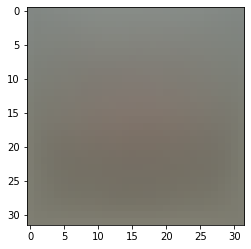

Training data shape:  (49000, 3072)


In [5]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image.shape)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

# second: subtract the mean image from train and test data

print('Training data shape: ', X_train.shape)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image


In [6]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.svm
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [10]:
import time
tic = time.time()
svm_estimator0 = SVC(kernel='poly',C=1,degree=3)
svm_estimator0.fit(X_train,y_train)
score = svm_estimator0.score(X_test,y_test)
print(score)
toc = time.time()
print('多项式核函数 Time:computed in %fs' % (toc - tic))

0.465


NameError: name 'loss_naive' is not defined

In [12]:
import time
tic = time.time()
svm_estimator0 = SVC(kernel='rbf',C=1)
svm_estimator0.fit(X_train,y_train)
score = svm_estimator0.score(X_test,y_test)
print(score)
toc = time.time()
print('Time:computed in %fs' % (toc - tic))

0.553
Time:computed in 8587.294403s


In [8]:
import time
tic = time.time()
svm_estimator0 = SVC(kernel='sigmoid',C=1)
svm_estimator0.fit(X_train,y_train)
score = svm_estimator0.score(X_test,y_test)
print(score)
toc = time.time()
print('Time:computed in %fs' % (toc - tic))

0.244
Time:computed in 6993.044922s


## 线性svm

In [9]:
import time
start = time.time()
svm_linear = sklearn.svm.LinearSVC()

svm_linear.fit(X_train,y_train)
score_train = svm_linear.score(X_train,y_train)
print("Train score :",score_train )
score_test = svm_linear.score(X_test,y_test)
print("Test score :",score_test )
end = time.time()
T = end - start
print("Time: %dh %dmin %f s" %(T/3600,T/60%60,T%60))

C:\Users\jsj\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train score : 0.28951020408163264
Test score : 0.221
Time: 0h 53min 3.197812 s


## 多项式核svm

In [4]:
import time
start = time.time()
svm_poly1 = SVC(kernel='poly',degree=1)
svm_poly1.fit(X_train,y_train)
score_train = svm_poly1.score(X_train,y_train)
print("Train score :",score_train)
score_test = svm_poly1.score(X_test,y_test)
print("Test score :",score_test)
end = time.time()
T = end - start
print("Time: %dh %dmin %f s" %(T/3600,T/60%60,T%60))

Train score : 0.45863265306122447
Test score : 0.294
Time: 17h 56min 26.287224 s


In [10]:
import time
start = time.time()
svm_poly2 = SVC(kernel='poly',degree=2)

svm_poly2.fit(X_train,y_train)
score_train = svm_poly2.score(X_train,y_train)
print("Train score :",score_train)
score_test = svm_poly2.score(X_test,y_test)
print("Test score :",score_test)
end = time.time()
T = end - start
print("Time: %dh %dmin %f s" %(T/3600,T/60%60,T%60))

Train score : 0.6160408163265306
Test score : 0.221
Time: 7h 23min 49.994425 s


In [11]:
import time
start = time.time()
svm_poly3 = SVC(kernel='poly',degree=3)

svm_poly3.fit(X_train,y_train)
score_train = svm_poly3.score(X_train,y_train)
print("Train score :",score_train)
score_test = svm_poly3.score(X_test,y_test)
print("Test score :",score_test)
end = time.time()
T = end - start
print("Time: %dh %dmin %f s" %(T/3600,T/60%60,T%60))

Train score : 0.7099795918367346
Test score : 0.221
Time: 6h 6min 15.164830 s


## sigmoid核svm

In [3]:
import time
print("start")
start = time.time()
svm_sigmoid = SVC(kernel='sigmoid',gamma = 0.0001,coef0=-0.1)

svm_sigmoid.fit(X_train,y_train)
score_train = svm_sigmoid.score(X_train,y_train)
print("Train score :",score_train)
score_test = svm_sigmoid.score(X_test,y_test)
print("Test score :",score_test)
end = time.time()
T = end - start
print("Time: %dh %dmin %f s" %(T/3600,T/60%60,T%60))

Train score : 0.214458416829
Test score : 0.224
Time: 1h 56min 33.044922 s


## rbf核svm

In [2]:
import time
start = time.time()
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train,y_train)
score_train = svm_rbf.score(X_train,y_train)
print("Train score :",score_train)
score_test = svm_rbf.score(X_test,y_test)
print("Test score :",score_test)
end = time.time()
T = end - start
print("Time: %dh %dmin %f s" %(T/3600,T/60%60,T%60))

Train score : 0.784799591673836
Test score : 0.553
Time: 2h 23min 7.294403 s
